## __Logistic Regression Demo__
### Analyzing the Impact of __Improved Sanitation__  and __House Electricity__ on __Women's Educational Attainment__ in India


#### Description of the Variables used in the Study:
1. **Female population age 6 years and above who ever attended school (%)**
   - Measures the percentage of females aged six and older who have attended school, reflecting educational access and cultural attitudes towards female education.

2. **Population living in households that use an improved sanitation facility (%)**
   - Indicates the percentage of the population with access to hygienic sanitation facilities, essential for health and well-being.

3. **Population living in households with electricity (%)**
   - Represents the proportion of the population living in homes with electricity, crucial for modern living and economic activities.

### Interrelation Between These Variables
The variables are interconnected through socio-economic development:

- **Education and Infrastructure**: Access to electricity can extend study hours and improve learning through digital resources, while better sanitation reduces disease and boosts school attendance.

- **Economic and Social Progress**: Improved infrastructure often correlates with economic development, which supports better educational facilities and enhances women's status in society.

### Predictive Insights
Using sanitation and electricity access to predict female educational attendance offers insights into:

- **Policy and Resource Allocation**: Data can inform policies and direct resources to improve infrastructure and thereby educational outcomes, particularly for women.

- **Cultural and Health Impact**: Better infrastructure can lead to cultural shifts regarding gender roles and improved community health, reinforcing the cycle of education and well-being.


In [ ]:
from IPython.display import Image
print("Flowchart for Logistic Regression")
Image(filename='img/flowchart logistic regression.drawio-2.png')  # for local images

### __Predicting Female School Attendance from Sanitation Facility only__

In [1]:
import numpy as np  # Import numPy for numerical computing
import pandas as pd  # Import pandas for data manipulation and analysis
from sklearn.model_selection import train_test_split  # Function to split data into train and test sets
from sklearn.linear_model import LogisticRegression  # Model for performing logistic regression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Metrics to evaluate model performance
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for making statistical graphics

### __Data preprocessing__

In [ ]:
data_all = pd.read_csv('../data/NFHS_5_India_Districts_Level.csv') # Load data from a CSV file into a pandas Dataframe.
data = data_all[(data_all['State/UT'] != 'India')]  # != mean not equal to
data.replace('*', np.nan, inplace=True) # Replace all '*' characters with NaN to handle missing values correctly.
data = data.apply(pd.to_numeric, errors='coerce') # Convert all columns to numeric types, coercing errors which can't be converted to NaN.
#67 (string) -> 67 (number)

# Data
# In logistic regression we are trying to predict the class of the target variables (NOT the values dirrectly)
# X    y
#________
# 67   1
# 34   0
# 83   1
# 91   1


# Prepare data by creating a binary target variable 'High_Attendance'. 
# This variable is 1 if the percentage of females who attended school is above the median, else putting 0.

# I am assigning a value 1 where female attendance >  median
# I am assigning a value 0 where female attendance <= median
median_ = np.median(data['Female population age 6 years and above who ever attended school (%)'])
print(median_)

# data['Female population age 6 years and above who ever attended school (%)'] >  median_   # True  OR 1
# data['Female population age 6 years and above who ever attended school (%)'] <= median_   # False OR 0

data['High_Attendance'] = (data['Female population age 6 years and above who ever attended school (%)'] > median_).astype(int)
data

# specify predictors selected for the model, "sanitation facility usage".
selected_predictors = ['Population living in households that use an improved sanitation facility2 (%)']

# data.shape
# data['High_Attendance']

71.3


### Logistic Regression with One Feature

C:\Users\Rahul\AppData\Local\Temp\ipykernel_21224\3609061927.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Low', 'High'])


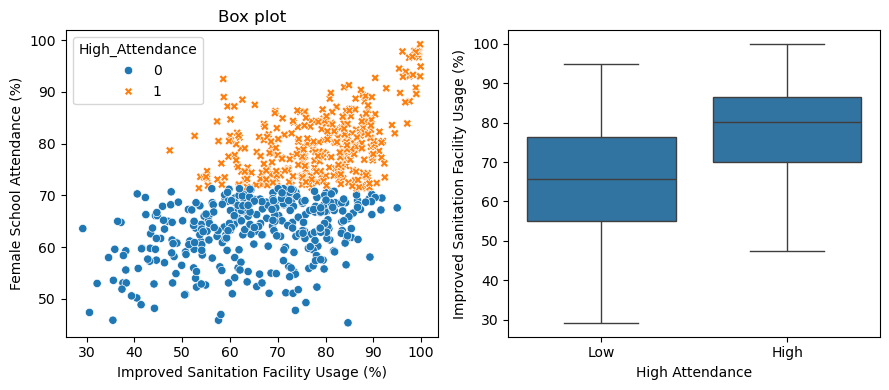

In [3]:
# Create a binary target variable based on the median attendance rate of women at school
median_attendance = data['Female population age 6 years and above who ever attended school (%)'].median()
data['High_Attendance'] = (data['Female population age 6 years and above who ever attended school (%)'] > median_attendance).astype(int)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

# Scatter plot for visualization of two continuous variables
sns.scatterplot(data,
                x='Population living in households that use an improved sanitation facility2 (%)', 
                y='Female population age 6 years and above who ever attended school (%)', 
                hue='High_Attendance', style='High_Attendance', ax=ax[0])

# ax[0].set_title('School Attendance vs. Sanitation Facility Use')
ax[0].set_xlabel('Improved Sanitation Facility Usage (%)')
ax[0].set_ylabel('Female School Attendance (%)')
ax[0].set_title("Scatter plot")

# Box plot for sanitation facility usage by school attendance category
sns.boxplot(x='High_Attendance', 
            y='Population living in households that use an improved sanitation facility2 (%)', 
            data=data, ax=ax[1], )
# ax[1].set_title('Sanitation Facility Use by School Attendance')
ax[1].set_xlabel('High Attendance')
ax[1].set_ylabel('Improved Sanitation Facility Usage (%)')
ax[1].set_xticklabels(['Low', 'High'])
ax[0].set_title("Box plot")

plt.tight_layout()
plt.show()


In [4]:
# Extract the features (X) and the target variable (y) from the datarame.
X = data[selected_predictors]  # Select features present on 'selected_predictors' - This is the one predictor
y = data['High_Attendance']    # Target variable indicating high attendance - This is the only target

# Split the dataset into training and testing sets.
# - 80% of the data is used for training, and 20% is used for testing.
# - The random_state parameter ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=40) # helps reproduce your result (PRNG)


In [ ]:
# Instantiate the Logistic Regression model.
model = LogisticRegression()  # Create a logistic regression model instance - instantiation operation

# Fit the model to the training data.
# This involves learning the coefficients for the predictor variables that minimize the loss function.
model.fit(X_train, y_train)  # Fit/train the model using the training dataset
# After this operation we say that our LR model has completed training

In [ ]:
# Predict the target variable for the test data using the trained model.
y_pred = model.predict(X_test)  # Predict responses for the observations in X_test

# Calculate the accuracy of the model on the test data.
# Accuracy is the proportion of correctly predicted observations to the total observations.
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model

# Print the calculated accuracy to output.
print("Accuracy:", accuracy)  # Display the accuracy of the model

In [ ]:
# Calculate the confusion matrix to evaluate the accuracy of a classification.
cm = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix from the actual and predicted values

# Use seaborn to create a heatmap visualization of the confusion matrix.
# - 'annot=True' displays the matrix numbers in the heatmap squares.
# - 'fmt="d"' formats the numbers as integers.
# - 'cmap="Blues"' uses the blue color palette for different values.
sns.heatmap(cm, annot=True, 
            fmt="d", cmap="Blues", 
            xticklabels=["Below Median", "Above Median"], 
            yticklabels=["Below Median", "Above Median"])

# Set the title of the heatmap visualization.
plt.title('Confusion Matrix (One Feature Case)')  # Title for the heatmap

# Label the x-axis and y-axis with appropriate descriptions.
plt.xlabel('Predicted Label')  # Label for the x-axis
plt.ylabel('True Label')  # Label for the y-axis

# Display the plot.
plt.show()  # Show the heatmap visualization of the confusion matrix


### __Visualizing the datapoints and Sigmoid graph__

In [ ]:
# Generate a range of values from the minimum to the maximum observed in the training set.
# This range will be used to demonstrate how the probability of high attendance changes with the predictor.
x_range = np.linspace(X_train.min(), X_train.max(), 300)

# Use the trained logistic regression model to predict probabilities for the generated range.
# The method predict_proba returns probabilities for each class; here, we select the probability of the '1' class (high attendance).
prob = model.predict_proba(x_range)[:, 1]

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(X_train[selected_predictors], y_train, c=y_train, 
            cmap='coolwarm', marker="x", s=18, label='Training Data')
plt.plot(x_range, prob, color='black', linewidth=2, label='Probability Curve')
plt.title('Probability of High Attendance vs. Sanitation Facility Use')
plt.xlabel('Improved Sanitation Facility (%)')
plt.ylabel('Probability of High Attendance')
plt.grid(ls="--")
plt.legend(loc='upper left')
plt.show()

# Hand Calculation for Model Evaluation

## Confusion Matrix
Here is the confusion matrix for the model:

|              | Predicted Below Median | Predicted Above Median |
|--------------|------------------------|------------------------|
| **Actual Below Median**  | 24                       | 11                       |
| **Actual Above Median** | 14                       | 22                       |

## Metrics Calculation
From the confusion matrix, we calculate the following metrics:
- Accuracy
- Precision
- Recall (Sensitivity)
- F1 Score

### Definitions and Formulas
- **Accuracy**: The proportion of true results (both true positives and true negatives) among the total number of cases examined.
- **Precision**: The proportion of predicted positives that are actually positive.
- **Recall**: The proportion of actual positives that are correctly identified.
- **F1 Score**: The weighted average of Precision and Recall.

### Calculations

#### Accuracy
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{22 + 24}{22 + 24 + 11 + 14} = \frac{46}{71} \approx 0.6479 \text{ or } 64.79\%
$$

#### Precision
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{22}{22 + 11} = \frac{22}{33} \approx 0.6667 \text{ or } 66.67\%
$$

#### Recall (Sensitivity)
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{22}{22 + 14} = \frac{22}{36} \approx 0.6111 \text{ or } 61.11\%
$$

#### F1 Score
$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.6667 \times 0.6111}{0.6667 + 0.6111} \approx 0.6378 \text{ or } 63.78\%
$$

## Conclusion
These metrics provide insight into the effectiveness of the classification model, highlighting areas of strength and opportunities for improvement.


### __Predicting Female School Attendance from Sanitation Facility and House Electricity__
### Logistic Regression with Two Features


In [ ]:
# Prepare data for two features
features = [
    'Population living in households that use an improved sanitation facility2 (%)',
    'Population living in households with electricity (%)'
]
data[features] = data[features].fillna(data[features].median())
data['High_Attendance'] = (data['Female population age 6 years and above who ever attended school (%)'] > 
                           data['Female population age 6 years and above who ever attended school (%)'].median()).astype(int)

X = data[features]
y = data['High_Attendance']

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Training the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

In [ ]:
# Calculate the confusion matrix to evaluate the accuracy of a classification.
cm = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix from the actual and predicted values

# Use seaborn to create a heatmap visualization of the confusion matrix.
# - 'annot=True' displays the matrix numbers in the heatmap squares.
# - 'fmt="d"' formats the numbers as integers.
# - 'cmap="Blues"' uses the blue color palette for different values.
sns.heatmap(cm, annot=True, 
            fmt="d", cmap="Blues", 
            xticklabels=["Below Median", "Above Median"], 
            yticklabels=["Below Median", "Above Median"])

# Set the title of the heatmap visualization.
plt.title('Confusion Matrix (2 Features Case)')  # Title for the heatmap

# Label the x-axis and y-axis with appropriate descriptions.
plt.xlabel('Predicted Label')  # Label for the x-axis
plt.ylabel('True Label')  # Label for the y-axis

# Display the plot.
plt.show()  # Show the heatmap visualization of the confusion matrix


### Visualization

In [ ]:
# Generating a mesh grid to plot decision boundary
x_min, x_max = X_train[features[0]].min() - 1, X_train[features[0]].max() + 1
y_min, y_max = X_train[features[1]].min() - 1, X_train[features[1]].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predicting probabilities on the mesh grid
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(7, 5))
contour = plt.contourf(xx, yy, Z, 25, cmap="seismic", alpha=0.4)
plt.colorbar(contour)
plt.scatter(X_train[features[0]], X_train[features[1]], c=y_train, 
            cmap='coolwarm', marker="x", s=18, edgecolors=None)
plt.title('Decision Boundary with Probability Gradient')
plt.xlabel('Improved Sanitation Facility Usage (%)')
plt.ylabel('Population living in households with electricity (%)')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.utils import resample

# Coefficients and intercept
coefficients = np.concatenate([model.intercept_, model.coef_.flatten()])

# Bootstrap to estimate standard errors
def bootstrap_se(X, y, model, N=1000):
    bootstrapped_coefs = np.zeros((N, len(coefficients)))
    for i in range(N):
        Xb, yb = resample(X, y)
        model.fit(Xb, yb)
        bootstrapped_coefs[i] = np.concatenate([model.intercept_, model.coef_.flatten()])
    return np.std(bootstrapped_coefs, axis=0)

se = bootstrap_se(X, y, model)

# Computing Z-statistics
z_stats = coefficients / se

# Computing P-values
p_values = 2 * norm.cdf(-np.abs(z_stats))

# Creating summary
summary_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Std. Error': se,
    'Z-statistic': z_stats,
    'P-value': p_values
}, index=['Intercept'] + [f'x{i}' for i in range(1, len(coefficients))])

print(summary_df)

## __Theory Review__

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is binary in nature (e.g., true/false or success/failure or 1/0). Main equations used in logistic regression are:

### (i) Logistic Function
The logistic or sigmoid function is crucial for transforming an input into a value between 0 and 1, which can be interpreted as a probability:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

### (ii) Model Equation
In logistic regression, the probability that the dependent variable Y equals 1 given the predictors X is modeled as:

$$
P(Y=1|X) = \sigma(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_n x_n)
$$

Where: <br>
$\beta_0 \cdots \beta_n$ are the parameter weights <br>
$x_1 \cdots x_n$ are the predictors

### (iii) Estimation of Coefficients
The coefficients $\beta_i$ in logistic regression are estimated using maximum likelihood estimation (MLE), which seeks the parameters that maximize the likelihood of the observed sample.

### (iv) Decision Rule
A typical decision rule for logistic regression is:

- Predict $Y = 1$ if $P(Y=1|X) \geq 0.5$
- Otherwise, predict $Y = 0$

This threshold can be adjusted depending on the specific needs of the analysis or the costs of different types of errors.
